In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import random
import time

# -------------------------------
# Load & Preprocess CIFAR-10 Dataset
# -------------------------------
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Dataset loaded and preprocessed.\n")


# -------------------------------
# Simulated Annealing for Hyperparameter Tuning
# -------------------------------
LEARNING_RATE_RANGE = (0.0001, 0.01)
DROPOUT_RANGE = (0.1, 0.5)
KERNEL_SIZES = [(3, 3), (5, 5)]
BATCH_SIZES = [32, 64, 128] 
FILTER_SIZES = [32, 64, 128] 

# Define Simulated Annealing parameters
initial_temperature = 10.0
cooling_rate = 0.9
iterations = 10

# Initial Hyperparameters
current_lr = 0.001  
current_dropout = 0.3  
current_kernel = (3, 3)  
current_batch_size = 32  
current_filters = 64  

def create_cnn(learning_rate, dropout_rate, kernel_size, batch_size, num_filters):
    model = models.Sequential([
        layers.Conv2D(num_filters, kernel_size, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(num_filters * 2, kernel_size, padding='same', use_bias=False, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_filters, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

print("Starting Simulated Annealing for Hyperparameter Tuning...\n")
start_time = time.time()

model = create_cnn(current_lr, current_dropout, current_kernel, current_batch_size, current_filters)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=current_batch_size, verbose=1)
current_val_acc = max(history.history['val_accuracy'])

temperature = initial_temperature
for i in range(iterations):
    iter_start = time.time()

    new_lr = np.clip(current_lr + np.random.uniform(-0.0005, 0.0005), *LEARNING_RATE_RANGE)
    new_dropout = np.clip(current_dropout + np.random.uniform(-0.05, 0.05), *DROPOUT_RANGE)
    new_kernel = random.choice(KERNEL_SIZES)
    new_batch_size = random.choice(BATCH_SIZES)
    new_filters = random.choice(FILTER_SIZES)

    new_model = create_cnn(new_lr, new_dropout, new_kernel, new_batch_size, new_filters)
    history = new_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=new_batch_size, verbose=1)
    new_val_acc = max(history.history['val_accuracy'])

    delta = new_val_acc - current_val_acc
    acceptance_prob = np.exp(delta / temperature) if delta < 0 else 1.0

    if np.random.rand() < acceptance_prob:
        current_lr, current_dropout, current_kernel, current_batch_size, current_filters, current_val_acc = (
            new_lr, new_dropout, new_kernel, new_batch_size, new_filters, new_val_acc
        )
        print(f"Iteration {i+1}: Accepted → LR: {current_lr:.5f}, Dropout: {current_dropout:.2f}, Kernel: {current_kernel}, Batch Size: {current_batch_size}, Filters: {current_filters}, Accuracy: {current_val_acc:.4f}")

    iter_end = time.time()
    print(f"Iteration {i+1} completed in {iter_end - iter_start:.2f} seconds.\n")
    temperature *= cooling_rate

best_lr = current_lr
best_dropout = current_dropout
best_kernel = current_kernel
best_batch_size = current_batch_size
best_filters = current_filters
best_val_acc = current_val_acc

end_time = time.time()
print(f"\nFinal Optimized Hyperparameters → LR: {best_lr:.5f}, Dropout: {best_dropout:.2f}, Kernel: {best_kernel}, Batch Size: {best_batch_size}, Filters: {best_filters}, Best Val Accuracy: {best_val_acc:.4f}")
print(f"Total Simulated Annealing time: {end_time - start_time:.2f} seconds.\n")

Loading CIFAR-10 dataset...
Dataset loaded and preprocessed.

Starting Simulated Annealing for Hyperparameter Tuning...



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.3304 - loss: 1.8268 - val_accuracy: 0.5596 - val_loss: 1.2534
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.5433 - loss: 1.2830 - val_accuracy: 0.6070 - val_loss: 1.1490
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.6053 - loss: 1.1188 - val_accuracy: 0.6574 - val_loss: 0.9813
Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.2752 - loss: 1.9588 - val_accuracy: 0.5046 - val_loss: 1.3955
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4642 - loss: 1.4725 - val_accuracy: 0.5722 - val_loss: 1.2377
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5277 - loss: 1.2945 - val_accuracy: 0.6136 - val_loss: 1.1108
Iteration 1: Accepted → LR: 0.00069, Dropout: 0.27, Kernel: (5, 5), Batch Size: 32, Filters: 32, Accuracy: 0.6136
Iteration 1 completed in 43.27 seconds.

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 135ms/step - acc

In [4]:
normal_cnn = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)), 
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, best_kernel, padding='same', use_bias=False, activation='relu'), 
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

normal_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),  
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

normal_cnn.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,154 (1.08 MB)

 Trainable params: 282,154 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Improved CNN with batch normalization and dropout, using best hyperparameters
improved_cnn = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, best_kernel, padding='valid', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, best_kernel, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.AveragePooling2D(pool_size=(2, 2)),

    layers.Conv2D(256, best_kernel, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(best_dropout),
    layers.Dense(128, activation='relu'),
    layers.Dropout(best_dropout),  
    layers.Dense(10, activation='softmax')
])

improved_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

improved_cnn.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 14, 14, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 7, 7, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 3, 3, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 3, 3, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,122 (3.87 MB)

 Trainable params: 1,013,162 (3.86 MB)

 Non-trainable params: 960 (3.75 KB)

In [8]:
# Adversarially-Trained CNN (same structure as Simple CNN)
adversarial_cnn = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, best_kernel, padding='same', use_bias=False, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

adversarial_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

adversarial_cnn.summary()
print("\nAdversarial CNN defined (same as Simple CNN). Will be trained on adversarial data later.\n")


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,154 (1.08 MB)

 Trainable params: 282,154 (1.08 MB)

 Non-trainable params: 0 (0.00 B)


Adversarial CNN defined (same as Simple CNN). Will be trained on adversarial data later.



In [10]:
# Hybrid CNN (same structure as Simple CNN)
hybrid_cnn = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, best_kernel, padding='same', use_bias=False, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

hybrid_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

hybrid_cnn.summary()
print("\nHybrid CNN defined (same as Simple CNN). Will be trained on 70% adversarial + 30% clean data later.\n")


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,154 (1.08 MB)

 Trainable params: 282,154 (1.08 MB)

 Non-trainable params: 0 (0.00 B)


Hybrid CNN defined (same as Simple CNN). Will be trained on 70% adversarial + 30% clean data later.



In [12]:
# ------------------------------
# Training Normal CNN on Clean CIFAR-10
# ------------------------------
print("\n🔵 Training Normal CNN on clean data...\n")
history_normal = normal_cnn.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=best_batch_size,
    verbose=1  # Shows progress bar and accuracy per epoch
)

# Optional: Print final metrics
print(f"\n🔹 Final Normal CNN Accuracy: {history_normal.history['accuracy'][-1]:.4f} | Validation Accuracy: {history_normal.history['val_accuracy'][-1]:.4f}\n")


# ------------------------------
# Training Improved CNN on Clean CIFAR-10
# ------------------------------
print("\n🟡 Training Improved CNN on clean data...\n")
history_improved = improved_cnn.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=best_batch_size,
    verbose=1
)

# Optional: Print final metrics
print(f"\n🔹 Final Improved CNN Accuracy: {history_improved.history['accuracy'][-1]:.4f} | Validation Accuracy: {history_improved.history['val_accuracy'][-1]:.4f}\n")



🔵 Training Normal CNN on clean data...

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3850 - loss: 1.6916 - val_accuracy: 0.5828 - val_loss: 1.1952
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6175 - loss: 1.0916 - val_accuracy: 0.6486 - val_loss: 1.0134
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6791 - loss: 0.9253 - val_accuracy: 0.6673 - val_loss: 0.9825
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7155 - loss: 0.8233 - val_accuracy: 0.6700 - val_loss: 0.9780
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7445 - loss: 0.7335 - val_accuracy: 0.6873 - val_loss: 0.9347
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7677 - loss: 0.6645 - val_accuracy: 0.6828 - val_loss: 0.9442
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7945 - loss: 0.5938 - val_accuracy: 0.6845 - val_loss: 0.9728
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/


🧪 Training FGSM Generator Model (used only to generate adversarial data)...
Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3395 - loss: 1.7870
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5998 - loss: 1.1377
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6685 - loss: 0.9587
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7024 - loss: 0.8669
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7307 - loss: 0.7845

⚡ Generating adversarial training and validation data (ε = 0.03)...
✅ FGSM adversarial datasets created.

🔍 Perturbed pixels in sample 0: 3072/3072


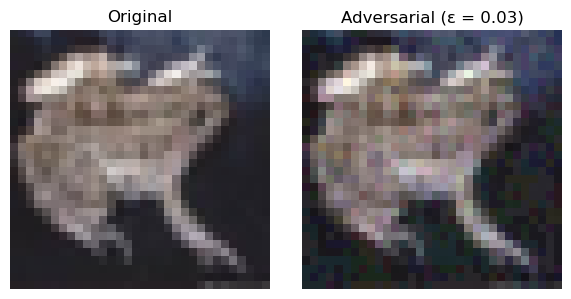

In [14]:
import matplotlib.pyplot as plt

print("\n🧪 Training FGSM Generator Model (used only to generate adversarial data)...")

# FGSM Generator Model (same as Simple CNN)
fgsm_generator_model = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, best_kernel, padding='same', use_bias=False, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

fgsm_generator_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

# Train the generator model (only used for attack crafting, not evaluation!)
fgsm_generator_model.fit(x_train, y_train, epochs=5, batch_size=best_batch_size, verbose=1)

# FGSM Attack Function (epsilon = 0.03)
def generate_fgsm_adversarial_data(model, x_data, y_data, epsilon=0.03):
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
    x_adversarial = tf.convert_to_tensor(x_data, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(x_adversarial)
        predictions = model(x_adversarial)
        loss = loss_object(y_data, predictions)

    gradients = tape.gradient(loss, x_adversarial)
    signed_grad = tf.sign(gradients)
    x_adversarial = x_adversarial + epsilon * signed_grad
    x_adversarial = tf.clip_by_value(x_adversarial, 0, 1)

    return x_adversarial.numpy()

print("\n⚡ Generating adversarial training and validation data (ε = 0.03)...")

# Generate adversarial datasets
x_train_adv = generate_fgsm_adversarial_data(fgsm_generator_model, x_train, y_train, epsilon=0.03)
x_val_adv = generate_fgsm_adversarial_data(fgsm_generator_model, x_val, y_val, epsilon=0.03)

print("✅ FGSM adversarial datasets created.\n")

# ------------------------------
# Visualize an adversarial example vs original
# ------------------------------
sample_index = 0
original_image = x_train[sample_index]
adversarial_image = x_train_adv[sample_index]

# Count how many pixels changed
pixel_diff = np.sum(np.abs(original_image - adversarial_image) > 0.001)
total_pixels = np.prod(original_image.shape)
print(f"🔍 Perturbed pixels in sample {sample_index}: {pixel_diff}/{total_pixels}")

# Show original and adversarial images side by side
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adversarial_image)
plt.title("Adversarial (ε = 0.03)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [16]:
print("\n🔴 Training Adversarial CNN on adversarial data...\n")

history_adv = adversarial_cnn.fit(
    x_train_adv, y_train,
    epochs=10,
    validation_data=(x_val_adv, y_val),
    batch_size=best_batch_size,
    verbose=1
)

# Optional: Print final training/validation accuracy
print(f"\n🔹 Final Adversarial CNN Accuracy: {history_adv.history['accuracy'][-1]:.4f} | Validation Accuracy: {history_adv.history['val_accuracy'][-1]:.4f}\n")



🔴 Training Adversarial CNN on adversarial data...

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3461 - loss: 1.7967 - val_accuracy: 0.6100 - val_loss: 1.2121
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6595 - loss: 1.0645 - val_accuracy: 0.7427 - val_loss: 0.8021
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7969 - loss: 0.6483 - val_accuracy: 0.8184 - val_loss: 0.5687
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8669 - loss: 0.4276 - val_accuracy: 0.8752 - val_loss: 0.3961
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9032 - loss: 0.3069 - val_accuracy: 0.8658 - val_loss: 0.4242
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9256 - loss: 0.2323 - val_accuracy: 0.8871 - val_loss: 0.3583
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9448 - loss: 0.1735 - val_accuracy: 0.8957 - val_loss: 0.3389
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━

In [18]:
print("\n🟣 Training Hybrid CNN on 70% adversarial + 30% clean data (no duplicate samples)...\n")

# Shuffle indices to avoid overlap
total_indices = np.arange(len(x_train))
np.random.shuffle(total_indices)

# Split indices
num_adv = int(0.7 * len(x_train))
adv_indices = total_indices[:num_adv]
clean_indices = total_indices[num_adv:]

# Get clean and adversarial parts without overlapping
x_adv_part = x_train_adv[adv_indices]
y_adv_part = y_train[adv_indices]

x_clean_part = x_train[clean_indices]
y_clean_part = y_train[clean_indices]

# Concatenate into hybrid dataset
hybrid_x_train = np.concatenate((x_adv_part, x_clean_part))
hybrid_y_train = np.concatenate((y_adv_part, y_clean_part))

# Train Hybrid CNN
history_hybrid = hybrid_cnn.fit(
    hybrid_x_train, hybrid_y_train,
    epochs=10,
    validation_data=(x_val, y_val),
    batch_size=best_batch_size,
    verbose=1
)

# Print final results
print(f"\n🔹 Final Hybrid CNN Accuracy: {history_hybrid.history['accuracy'][-1]:.4f} | Validation Accuracy: {history_hybrid.history['val_accuracy'][-1]:.4f}\n")



🟣 Training Hybrid CNN on 70% adversarial + 30% clean data (no duplicate samples)...

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3432 - loss: 1.7960 - val_accuracy: 0.5160 - val_loss: 1.3520
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5334 - loss: 1.3277 - val_accuracy: 0.5045 - val_loss: 1.3605
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6551 - loss: 1.0364 - val_accuracy: 0.5320 - val_loss: 1.3121
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7174 - loss: 0.8608 - val_accuracy: 0.5383 - val_loss: 1.3220
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7627 - loss: 0.7268 - val_accuracy: 0.5513 - val_loss: 1.3242
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7958 - loss: 0.6225 - val_accuracy: 0.5438 - val_loss: 1.3554
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8148 - loss: 0.5549 - val_accuracy: 0.5350 - val_loss: 1.4654
Epoc

In [20]:
print("\n🧪 Training separate FGSM Generator for test set...\n")

# Define a fresh FGSM generator model (same structure as Simple CNN)
test_fgsm_model = models.Sequential([
    layers.Conv2D(32, best_kernel, padding='same', use_bias=False, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, best_kernel, padding='same', use_bias=False, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

test_fgsm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Train only for attack generation (not for evaluation)
test_fgsm_model.fit(x_train, y_train, epochs=5, batch_size=best_batch_size, verbose=1)

# Generate adversarial test set
print("\n⚡ Generating FGSM adversarial test data (ε = 0.03)...\n")
x_test_adv = generate_fgsm_adversarial_data(test_fgsm_model, x_test, y_test, epsilon=0.03)

# Create 50/50 split (randomized, no overlap)
total_indices = np.arange(len(x_test))
np.random.shuffle(total_indices)

half = len(x_test) // 2
clean_test_indices = total_indices[:half]
adv_test_indices = total_indices[half:]

x_test_50 = np.concatenate((x_test[clean_test_indices], x_test_adv[adv_test_indices]))
y_test_50 = np.concatenate((y_test[clean_test_indices], y_test[adv_test_indices]))

print("✅ 50/50 Clean/Adversarial test set created.")
print(f"Clean samples: {len(clean_test_indices)} | Adversarial samples: {len(adv_test_indices)}\n")

# Optional: Sanity check that there is no overlap
overlap = np.intersect1d(clean_test_indices, adv_test_indices)
print(f"🔍 Overlapping test samples between clean/adv split: {len(overlap)}")  # should be 0



🧪 Training separate FGSM Generator for test set...

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3340 - loss: 1.8119
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5749 - loss: 1.2079
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6401 - loss: 1.0304
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6722 - loss: 0.9279
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7054 - loss: 0.8515

⚡ Generating FGSM adversarial test data (ε = 0.03)...

✅ 50/50 Clean/Adversarial test set created.
Clean samples: 5000 | Adversarial samples: 5000

🔍 Overlapping test samples between clean/adv split: 0


In [22]:
print("\n📊 Evaluating All Models on Clean, Adversarial, and 50/50 Mixed Test Sets...\n")

models_to_test = {
    "Normal CNN": normal_cnn,
    "Improved CNN": improved_cnn,
    "Adversarial CNN": adversarial_cnn,
    "Hybrid CNN": hybrid_cnn
}

results = {
    "Model": [],
    "Clean Accuracy": [],
    "Adversarial Accuracy": [],
    "50/50 Accuracy": []
}

for name, model in models_to_test.items():
    print(f"🔎 Evaluating {name}...")
    clean_acc = model.evaluate(x_test, y_test, verbose=0)[1]
    adv_acc = model.evaluate(x_test_adv, y_test, verbose=0)[1]
    mixed_acc = model.evaluate(x_test_50, y_test_50, verbose=0)[1]

    print(f"   ✅ Clean Accuracy: {clean_acc:.4f}")
    print(f"   ⚠️  Adversarial Accuracy: {adv_acc:.4f}")
    print(f"   🔀 50/50 Accuracy: {mixed_acc:.4f}\n")

    results["Model"].append(name)
    results["Clean Accuracy"].append(clean_acc)
    results["Adversarial Accuracy"].append(adv_acc)
    results["50/50 Accuracy"].append(mixed_acc)



📊 Evaluating All Models on Clean, Adversarial, and 50/50 Mixed Test Sets...

🔎 Evaluating Normal CNN...
   ✅ Clean Accuracy: 0.6782
   ⚠️  Adversarial Accuracy: 0.2574
   🔀 50/50 Accuracy: 0.4648

🔎 Evaluating Improved CNN...
   ✅ Clean Accuracy: 0.7249
   ⚠️  Adversarial Accuracy: 0.4584
   🔀 50/50 Accuracy: 0.5905

🔎 Evaluating Adversarial CNN...
   ✅ Clean Accuracy: 0.3819
   ⚠️  Adversarial Accuracy: 0.5688
   🔀 50/50 Accuracy: 0.4764

🔎 Evaluating Hybrid CNN...
   ✅ Clean Accuracy: 0.5373
   ⚠️  Adversarial Accuracy: 0.4983
   🔀 50/50 Accuracy: 0.5177



In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Optional: round values for display
df_results_rounded = df_results.copy()
df_results_rounded.iloc[:, 1:] = df_results_rounded.iloc[:, 1:].round(4)

print("\n📋 Evaluation Results Table:")
print(df_results_rounded)



📋 Evaluation Results Table:
             Model  Clean Accuracy  Adversarial Accuracy  50/50 Accuracy
0       Normal CNN          0.6782                0.2574          0.4648
1     Improved CNN          0.7249                0.4584          0.5905
2  Adversarial CNN          0.3819                0.5688          0.4764
3       Hybrid CNN          0.5373                0.4983          0.5177


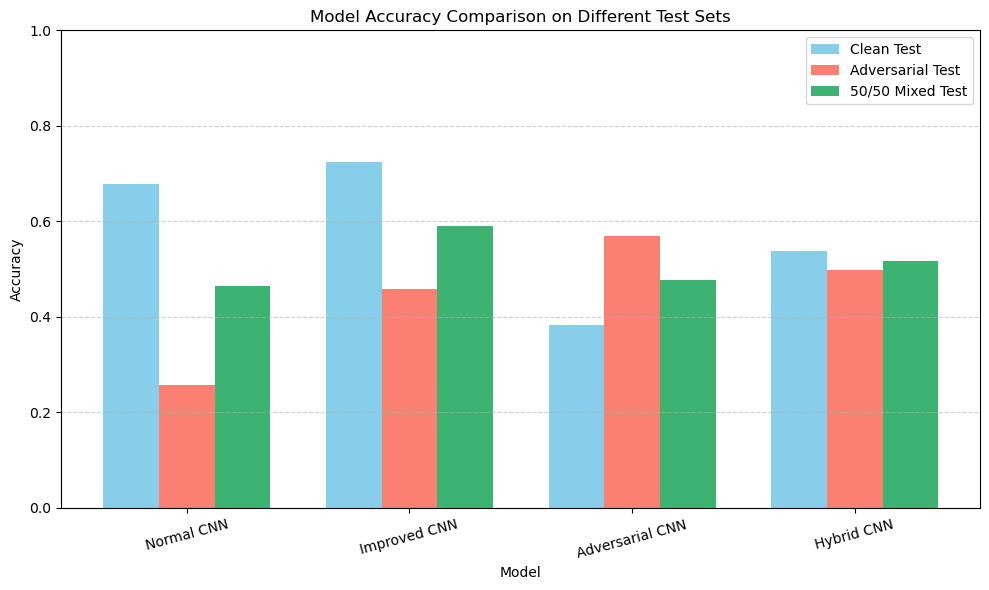

In [26]:
# Plotting grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(df_results["Model"]))

plt.bar(index, df_results["Clean Accuracy"], bar_width, label='Clean Test', color='skyblue')
plt.bar(index + bar_width, df_results["Adversarial Accuracy"], bar_width, label='Adversarial Test', color='salmon')
plt.bar(index + 2 * bar_width, df_results["50/50 Accuracy"], bar_width, label='50/50 Mixed Test', color='mediumseagreen')

# Labels and legend
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison on Different Test Sets')
plt.xticks(index + bar_width, df_results["Model"], rotation=15)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
